##### IMPORT NECESSARY LIBRARIES

In [4]:
# Import required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk

##### DOWNLOAD NLTK DATASETS

In [6]:
# Download NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\nafeesa
[nltk_data]     hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\nafeesa
[nltk_data]     hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##### LOAD THE DATASET

In [8]:
#Load the dataset
data = pd.read_csv('Game_App_Reviews.csv')

In [9]:
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


##### EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
data.shape

(19996, 2)

In [12]:
# Check for the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [13]:
data.describe(include = 'all')

,Text,label
count,19996,19996.000000
unique,19996,NaN
top,This is the best apps acording to a bunch of ...,NaN
freq,1,NaN
mean,NaN,0.761652
std,NaN,0.426083
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [14]:
# Check for any null values in the dataset
print("Missing Data:\n", data.isnull().sum())

Missing Data:
 Text     0
label    0
dtype: int64


##### TEXT CLASSIFICATION

In [16]:
# Select a sample comment
simple_text = "this is awesome and you don't need wi ti to play trust me. it is really fun and addicting. there are like 100 levels it is even free don't waste your money on the expensive one I mean seriously. get the app"

##### TOKENIZATION

In [18]:
# Tokenization
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(simple_text.lower())  # Tokenize and lowercase
print("Tokens after Tokenization:")
print(tokens)

Tokens after Tokenization:
['this', 'is', 'awesome', 'and', 'you', 'don', 't', 'need', 'wi', 'ti', 'to', 'play', 'trust', 'me', 'it', 'is', 'really', 'fun', 'and', 'addicting', 'there', 'are', 'like', '100', 'levels', 'it', 'is', 'even', 'free', 'don', 't', 'waste', 'your', 'money', 'on', 'the', 'expensive', 'one', 'i', 'mean', 'seriously', 'get', 'the', 'app']


##### STOP WORDS

In [20]:
# Remove stopwords using list comprehension
stop_words = set(stopwords.words('english'))
tokens_without_stopwords = [word for word in tokens if word not in stop_words]
print("\nTokens after Stopword Removal:")
print(tokens_without_stopwords)


Tokens after Stopword Removal:
['awesome', 'need', 'wi', 'ti', 'play', 'trust', 'really', 'fun', 'addicting', 'like', '100', 'levels', 'even', 'free', 'waste', 'money', 'expensive', 'one', 'mean', 'seriously', 'get', 'app']


##### LEMMATIZATION

In [22]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_without_stopwords]
print("\nTokens after Lemmatization:")
print(lemmatized_tokens)


Tokens after Lemmatization:
['awesome', 'need', 'wi', 'ti', 'play', 'trust', 'really', 'fun', 'addicting', 'like', '100', 'level', 'even', 'free', 'waste', 'money', 'expensive', 'one', 'mean', 'seriously', 'get', 'app']


##### CLEANED TEXT

In [24]:
# Combine tokens into cleaned text
cleaned_text = ' '.join(lemmatized_tokens)
print("\nFinal Cleaned Text:")
print(cleaned_text)


Final Cleaned Text:
awesome need wi ti play trust really fun addicting like 100 level even free waste money expensive one mean seriously get app


In [25]:
# Categorize ratings ('label' is used for ratings)
def categorize_rating(rating):
    return "Low" if rating < 1 else "High"

# Apply the function to the 'label' column
data['Rating_Category'] = data['label'].apply(categorize_rating)

# Display the first few rows with the new category column
data.head()

,Text,label,Rating_Category
0,This is the best apps acording to a bunch of ...,1,High
1,This is a pretty good version of the game for ...,1,High
2,this is a really . there are a bunch of levels...,1,High
3,"This is a silly game and can be frustrating, b...",1,High
4,This is a terrific game on any pad. Hrs of fun...,1,High


##### DATA PREPROCESSING TO THE ENTIRE DATASET

In [27]:
# Apply preprocessing to the entire dataset
def preprocess_text(text):
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    tokens = tokenizer.tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [28]:
# Apply preprocessing to the "Comments" column
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

In [29]:
print(data['Cleaned_Text'].head())

0    best apps acording bunch people agree bomb egg...
1    pretty good version game free lot different le...
2         really bunch level find golden egg super fun
3    silly game frustrating lot fun definitely reco...
4    terrific game pad hr fun grandkids love great ...
Name: Cleaned_Text, dtype: object


##### SPLIT THE DATA

In [31]:
# Split the data into training and test sets
X = data['Cleaned_Text']  
y = data['Rating_Category']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### COUNT VECTORIZER

In [33]:
# Convert text to numeric data using Bag-of-Words (CountVectorizer)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##### HANDLE CLASS IMBALANCE

<Axes: xlabel='Rating_Category', ylabel='count'>

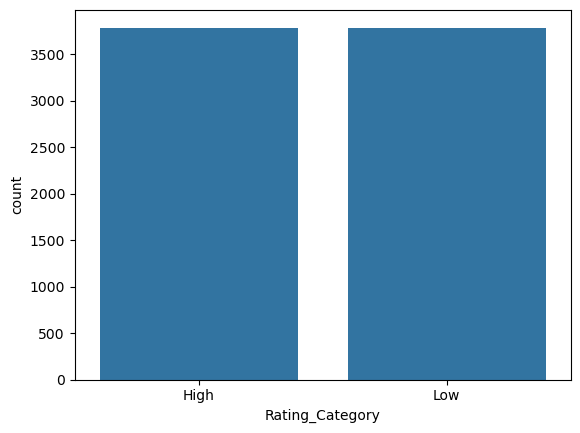

In [35]:
# Handle class imbalance using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_vec, y_train)
sns.countplot(x=y_train_resampled)

##### TRAIN A MODEL

In [37]:
# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

##### EVALUATE THE MODEL

In [39]:
# Evaluate the model on the test set
y_pred = nb_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nNaive Bayes Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Naive Bayes Classifier Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.85      0.90      3022
         Low       0.66      0.87      0.75       978

    accuracy                           0.86      4000
   macro avg       0.80      0.86      0.82      4000
weighted avg       0.88      0.86      0.86      4000



##### SENTIMENT ANALYSIS

In [41]:
# Import libraries for sentiment analysis 
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [42]:
# Download VADER resources for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\nafeesa
[nltk_data]     hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

##### VADER (Valence Aware Dictionary for Sentiment Reasoning)

In [44]:
# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

In [45]:
# Calculate sentiment scores for each comment
data['Sentiment_Score'] = data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [46]:
# Categorize sentiment
data['Sentiment'] = data['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Summary of sentiments
print(data['Sentiment'].value_counts())

Sentiment
Positive    15620
Negative     4376
Name: count, dtype: int64


In [47]:
data['Sentiment'].describe()

count        19996
unique           2
top       Positive
freq         15620
Name: Sentiment, dtype: object

In [48]:
# Display a sample of sentiment scores and labels
data[['Text', 'Sentiment_Score', 'Sentiment']].head()

,Text,Sentiment_Score,Sentiment
0,This is the best apps acording to a bunch of ...,0.7717,Positive
1,This is a pretty good version of the game for ...,0.9325,Positive
2,this is a really . there are a bunch of levels...,0.8020,Positive
3,"This is a silly game and can be frustrating, b...",0.9413,Positive
4,This is a terrific game on any pad. Hrs of fun...,0.9552,Positive


In [49]:
data[['Text', 'Sentiment_Score', 'Sentiment']].describe(include = 'all')

,Text,Sentiment_Score,Sentiment
count,19996,19996.000000,19996
unique,19996,NaN,2
top,This is the best apps acording to a bunch of ...,NaN,Positive
freq,1,NaN,15620
mean,NaN,0.462548,NaN
std,NaN,0.535158,NaN
min,NaN,-0.986000,NaN
25%,NaN,0.165500,NaN
50%,NaN,0.699600,NaN
75%,NaN,0.875000,NaN


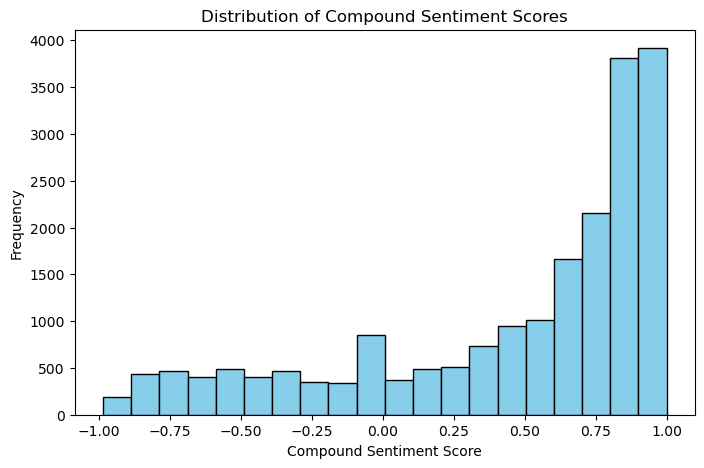

In [50]:
# Visualize sentiment scores with a histogram
plt.figure(figsize=(8, 5))
plt.hist(data['Sentiment_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Calculate and display sentiment proportions
sentiment_counts = data['Sentiment'].value_counts(normalize=True) * 100
print("\nPercentage of Sentiments:")
print(sentiment_counts)


Percentage of Sentiments:
Sentiment
Positive    78.115623
Negative    21.884377
Name: proportion, dtype: float64


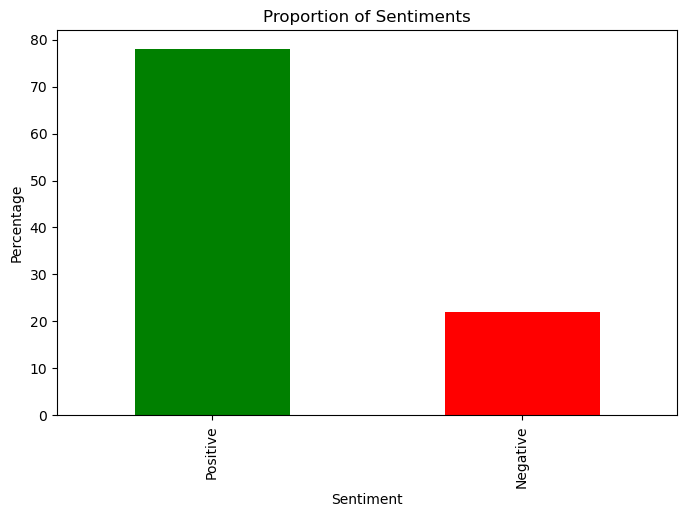

In [52]:
# Visualize sentiment proportions as a bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Proportion of Sentiments")
plt.ylabel("Percentage")
plt.xlabel("Sentiment")
plt.show()

##### WORD CLOUD FOR POSITIVE SENTIMENTS

In [54]:
# Generate word clouds for positive sentiments
positive_text = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

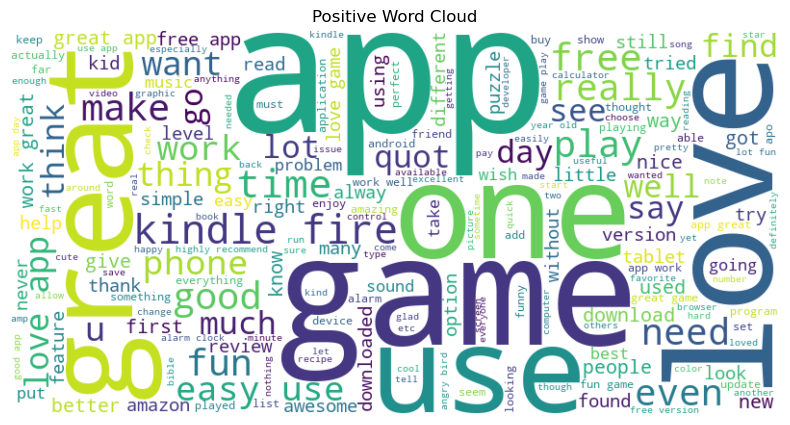

In [55]:
# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')
plt.show()

##### WORD CLOUD FOR NEGATIVE SENTIMENTS

In [57]:
# Generate word clouds for negative sentiments
negative_text = ' '.join(data[data['Sentiment'] == 'Negative']['Cleaned_Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

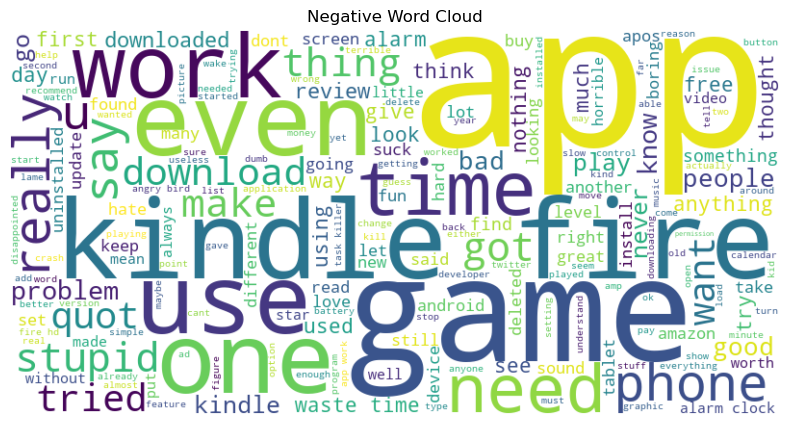

In [58]:
# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')
plt.show()

##### WORD FREQUENCIES POSITIVE REVIEWS


Most Common Positive Words:
[('app', 8473), ('game', 5646), ('love', 4166), ('great', 3940), ('like', 3464), ('use', 2807), ('get', 2499), ('fun', 2469), ('one', 2346), ('work', 2241)]


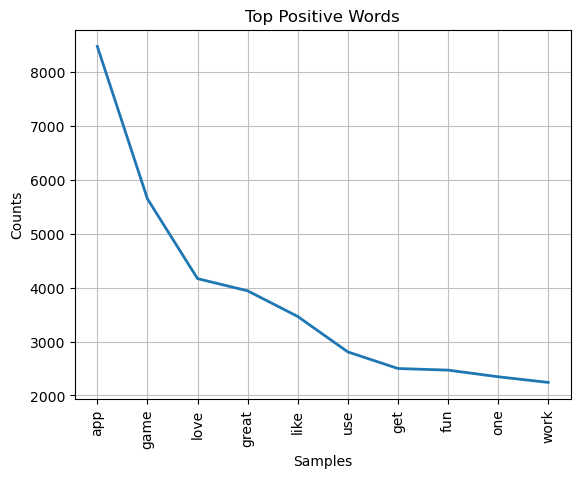

<Axes: title={'center': 'Top Positive Words'}, xlabel='Samples', ylabel='Counts'>

In [60]:
# Display the most frequent words in positive reviews
positive_tokens = positive_text.split()
fdist_positive = FreqDist(positive_tokens)
print("\nMost Common Positive Words:")
print(fdist_positive.most_common(10))
fdist_positive.plot(10, title='Top Positive Words')

##### WORD FREQUENCIES NEGATIVE REVIEWS


Most Common Negative Words:
[('app', 2403), ('game', 1251), ('get', 1000), ('kindle', 833), ('time', 761), ('fire', 637), ('work', 615), ('like', 578), ('one', 516), ('even', 512)]


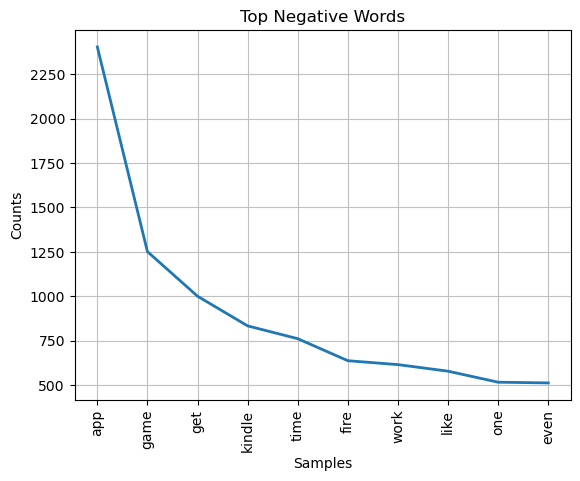

<Axes: title={'center': 'Top Negative Words'}, xlabel='Samples', ylabel='Counts'>

In [62]:
# Display the most frequent words in negative reviews
negative_tokens = negative_text.split()
fdist_negative = FreqDist(negative_tokens)
print("\nMost Common Negative Words:")
print(fdist_negative.most_common(10))
fdist_negative.plot(10, title='Top Negative Words')